# Sequential Feature Selection

In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import  datasets

In [39]:
dataobj = datasets.load_wine()

In [40]:
X = pd.DataFrame(dataobj.data, columns=list(dataobj.feature_names))
X.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


In [41]:
y = dataobj.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [42]:
df = pd.concat([X, pd.DataFrame(y, columns=['target'])], axis = 1)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


# Spliting data

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=1, stratify=y)
print(f'X_train.shape = {X_train.shape}')
print(f'X_test.shape = {X_test.shape}')

X_train.shape = (124, 13)
X_test.shape = (54, 13)


# Standardization

In [44]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
scl.fit(X_train)
X_train_s = scl.transform(X_train)
X_test_s = scl.transform(X_test)

In [45]:
import warnings
warnings.filterwarnings("ignore")

# Backward Selection

In [46]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

In [53]:
back_n = []
back_acc =[]
back_num = []

for n in range(X.shape[1] - 1, 0, -1):
    #print(n)
    knn = KNeighborsClassifier(n_neighbors=3)
    sel = SequentialFeatureSelector(knn, n_features_to_select=n, direction='backward', scoring='accuracy')
    sel.fit(X_train_s, y_train)
    
    X_train_t = sel.transform(X_train)
    knn.fit(X_train_t, y_train)
    
    back_n.append((n, list(X[X.columns[sel.get_support()]])))
    back_acc.append(knn.score(X_train_t, y_train))
    back_num.append(n)
    

In [54]:
for e in back_n:
    print(f'Number of feature = {e[0]} \n')
    print(e[1])
    print('\n')
    print('--'*50 + '\n')

Number of feature = 12 

['alcohol', 'malic_acid', 'ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


----------------------------------------------------------------------------------------------------

Number of feature = 11 

['alcohol', 'malic_acid', 'ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


----------------------------------------------------------------------------------------------------

Number of feature = 10 

['alcohol', 'malic_acid', 'ash', 'magnesium', 'total_phenols', 'flavanoids', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


----------------------------------------------------------------------------------------------------

Number of feature = 9 

['alcohol', 'malic_acid', 'ash', 'magnesium', 'flavanoids', 'color_intensity', 'hue'

# Forward Selection

In [55]:
fwd_n = []
fwd_acc =[]
fwd_num = []

for n in range(1, X.shape[1]):
    #print(n)
    knn = KNeighborsClassifier(n_neighbors=3)
    sel = SequentialFeatureSelector(knn, n_features_to_select=n, direction='forward', scoring='accuracy')
    sel.fit(X_train_s, y_train)
    
    X_train_t = sel.transform(X_train)
    knn.fit(X_train_t, y_train)
    
    fwd_n.append((n, list(X[X.columns[sel.get_support()]])))
    fwd_acc.append(knn.score(X_train_t, y_train))
    fwd_num.append(n)

In [56]:
for e in fwd_n:
    print(f'Number of feature = {e[0]} \n')
    print(e[1])
    print('\n')
    print('--'*50 + '\n')

Number of feature = 1 

['flavanoids']


----------------------------------------------------------------------------------------------------

Number of feature = 2 

['flavanoids', 'color_intensity']


----------------------------------------------------------------------------------------------------

Number of feature = 3 

['flavanoids', 'color_intensity', 'proline']


----------------------------------------------------------------------------------------------------

Number of feature = 4 

['alcalinity_of_ash', 'flavanoids', 'color_intensity', 'proline']


----------------------------------------------------------------------------------------------------

Number of feature = 5 

['alcalinity_of_ash', 'flavanoids', 'color_intensity', 'hue', 'proline']


----------------------------------------------------------------------------------------------------

Number of feature = 6 

['alcohol', 'alcalinity_of_ash', 'flavanoids', 'color_intensity', 'hue', 'proline']


-----------------

# Compair result

In [62]:
back = pd.DataFrame({'accuracy':back_acc}, index=back_num)
back

,accuracy
12,0.822581
11,0.822581
10,0.822581
9,0.822581
8,0.822581
7,0.879032
6,0.870968
5,0.870968
4,0.870968
3,0.943548


In [61]:
fwd = pd.DataFrame({'accuracy':fwd_acc}, index=fwd_num)
fwd

,accuracy
1,0.854839
2,0.951613
3,0.879032
4,0.870968
5,0.870968
6,0.870968
7,0.870968
8,0.870968
9,0.870968
10,0.870968


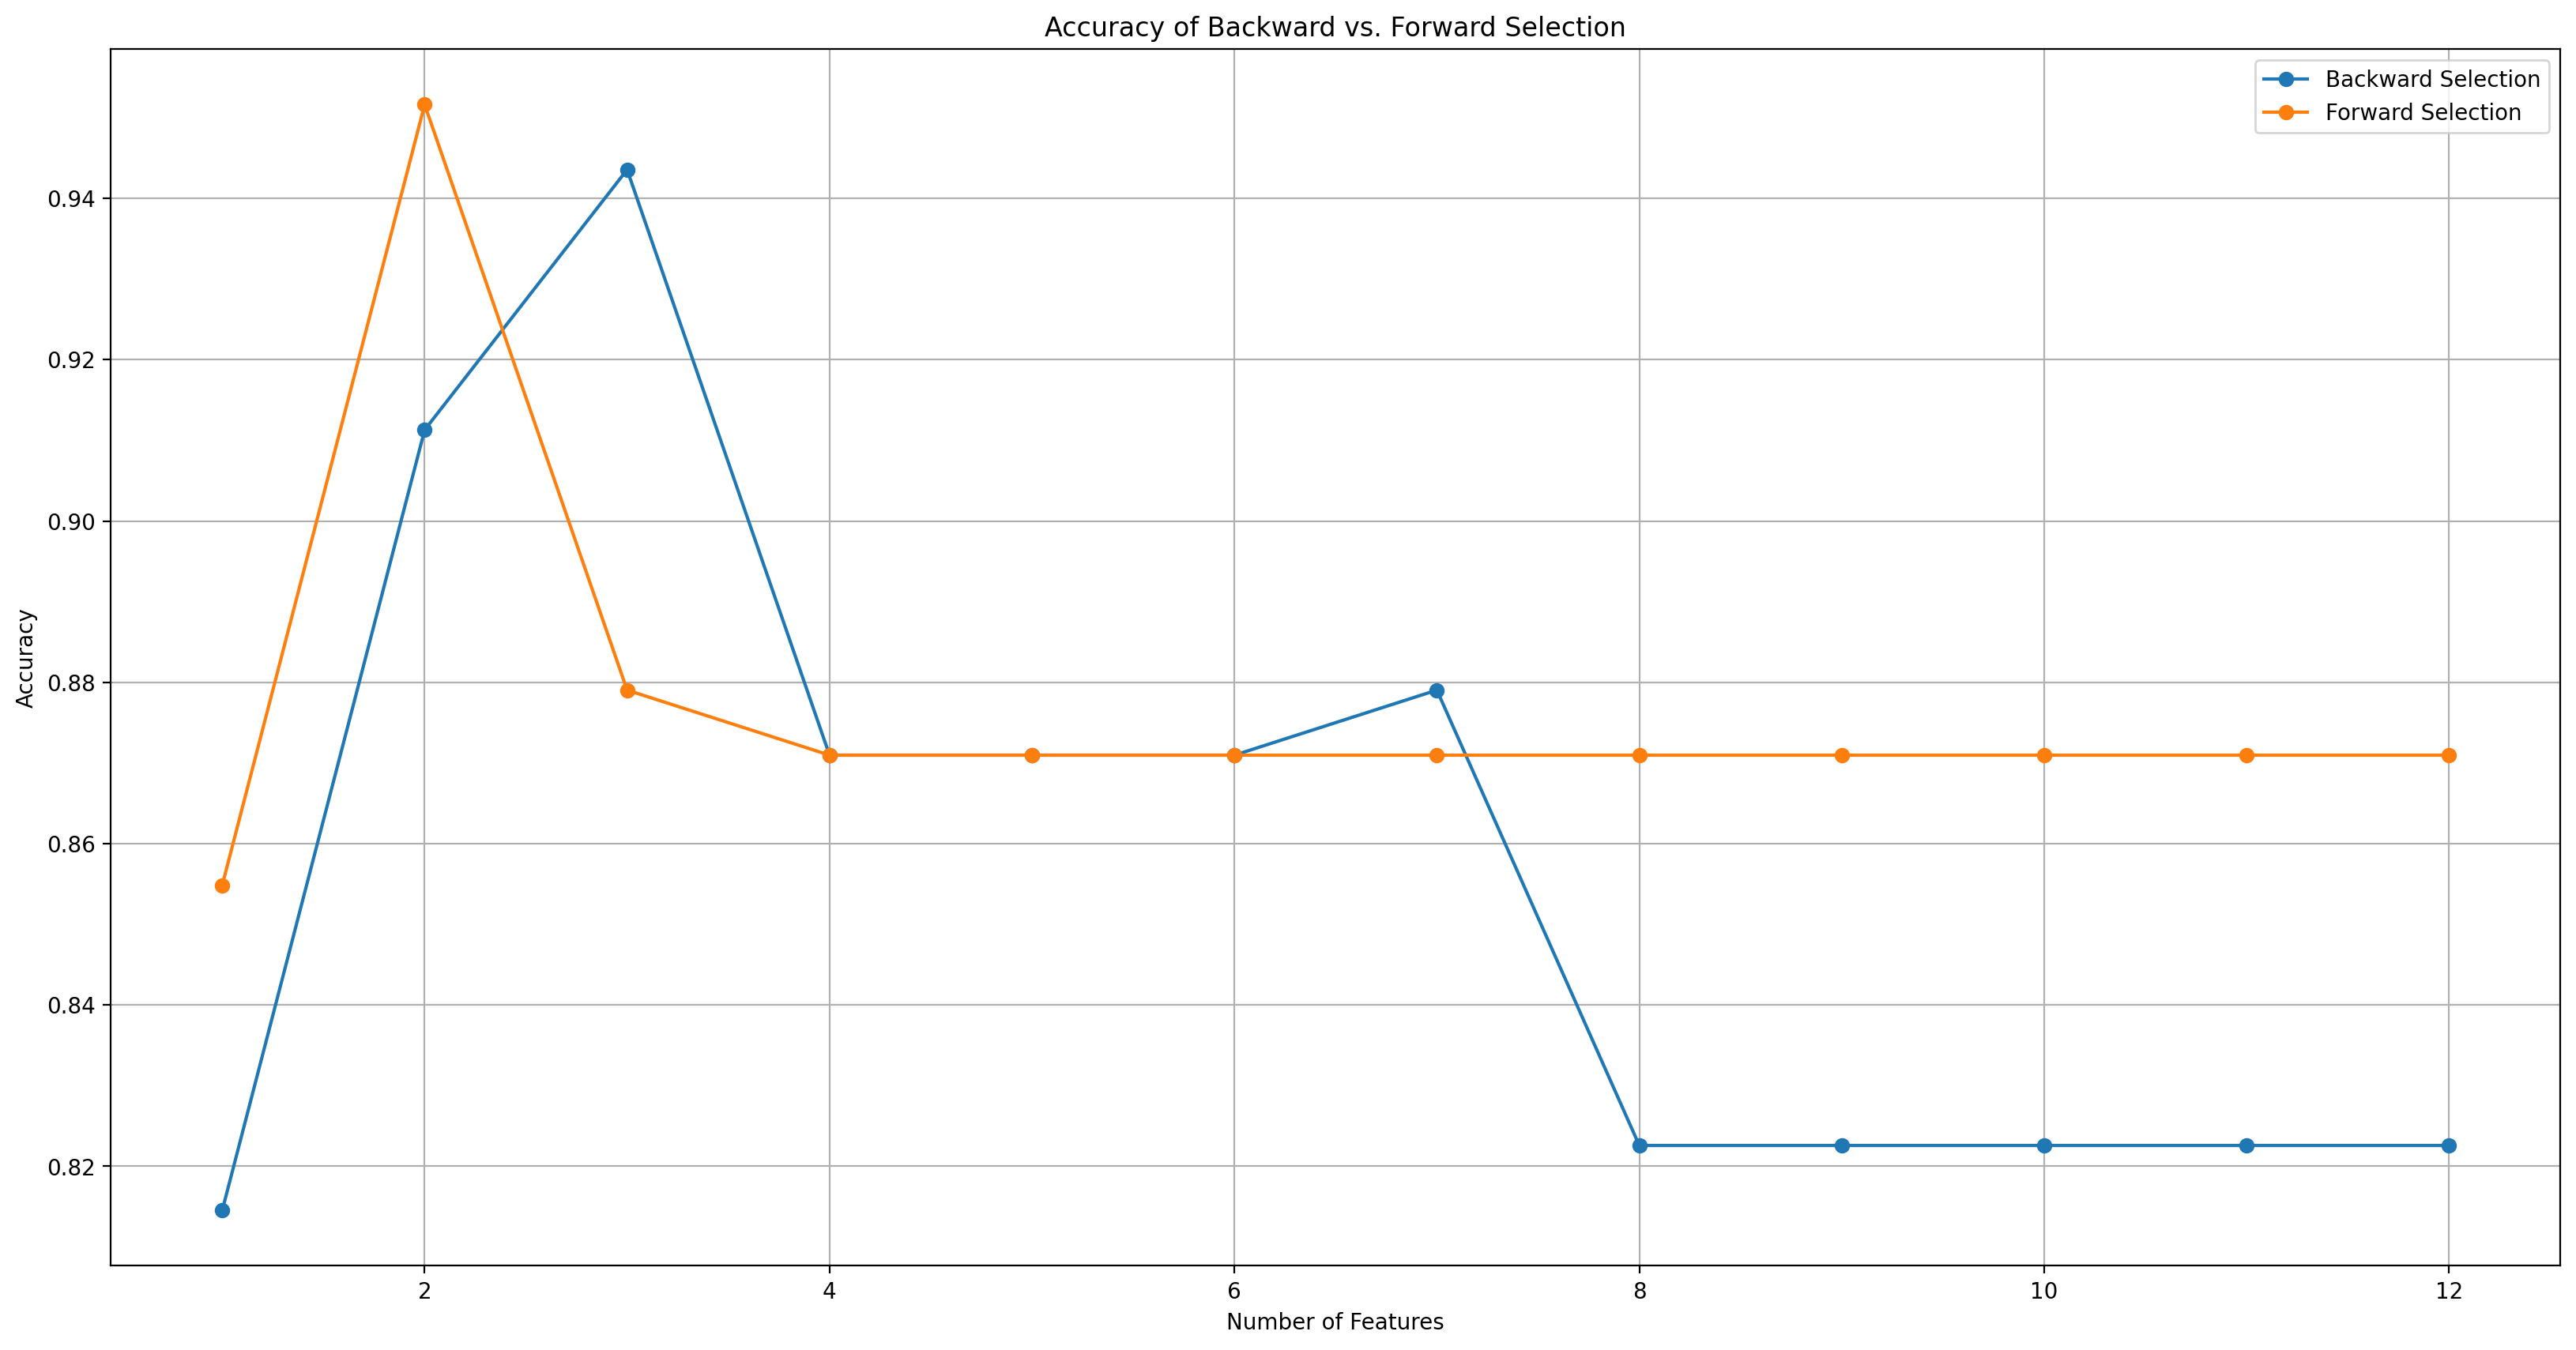

In [77]:
## ploting
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots(1, 1, figsize=(20,10))
ax.plot(back['accuracy'], marker='o', label='Backward Selection')
ax.plot(fwd['accuracy'], marker='o', label='Forward Selection')
ax.legend()
ax.set_title('Accuracy of Backward vs. Forward Selection')
ax.set_xlabel('Number of Features')
ax.set_ylabel('Accuracy')
ax.grid();